<h1 style=" font-size: 40px;">Probability and Statistics Project</h1>
<p style="font-family: NewTimesRoman; font-size: 25px;">Parsa Mohammadpour</p>

First we install packages that we are going to use in this project

In [1]:
# pip install matplotlib numpy pandas seaborn

# Question 1:  Understanding and Simulating Lognormal Distribution

## Description

The distribution of earnings in a small society of 10,000 individuals follows a **lognormal distribution** due to multiplicative growth over time.

## Tasks:

### Task 1:

#### Task
Initialize a population of 10,000 individuals, each with an initial earning of $1.

#### Answer

Here, we define some variables for configuration and initialize them as the task requires.<br>
We define `INDIVIDUAL_COUNT=10000` and `INITIAL_EARNING=1` as follows:

In [2]:
INDIVIDUAL_COUNT=10000
INITIAL_EARNING=1

Noew, we define a numpy array of individuals and initiliza it with the `INITIAL_EARNING` value at each index as follow:

In [3]:
import numpy as np

earnings = np.full(INDIVIDUAL_COUNT, INITIAL_EARNING)
earnings

array([1, 1, 1, ..., 1, 1, 1])

### Task 2:

#### Task:
Simulate the growth process for 20 periods:
- Each year, earnings grow or shrink by a factor of:
    - 1.10 (10% increase)
    - 1.00 (no change)
    - 0.90 (10% decrease)
  with equal probabilities

#### Answer

For this purpose, we define a variable `PERIOD_NUM` and `EARNING_LIST` and we initialize them with the value that is given in the task description. The code is as follows:

In [4]:
PERIOD_NUM = 20
EARNING_LIST = [1.1, 1.0, 0.9]

Now, as the task requires that we apply each year's earnings on the individuals for `PERIOD_NUM` years:
So, we will have a loop over `PERIOD_NUM` and then at each iteration, for each individual, we have to choose a random element from the `EARNING_LIST` and multiply the individual's earnings by the chosen element.<br>
So, for this, at each iteration that we have (the loop that we have for `PERIOD_NUM`), we randomly (this random selection obeys the **uniform distribution**) choose an element of the `EARNING_LIST`. We do this by calling `np.random.choice()` function which gets three inputs, the list that we want to randomly select its element, the number of these selections, and a boolean to say we choose with or without replacement. (For the next question, we need to have the individuals for the same period, so we keep each year's earnings in a list called `earnings_period_list` and we use it there.)

In [5]:
earnings_period_list = []
for _ in range(PERIOD_NUM):
    earning_list = np.random.choice(EARNING_LIST, len(earnings), replace=True)
    earnings = earnings * earning_list
    earnings_period_list.append(earnings)
earnings

array([1.27855329, 0.85589104, 1.26576776, ..., 1.12779907, 1.27855329,
       1.13919098])

### Task 3:

#### Task:
Record the final earnings of all individuals after 20 periods.

#### Answer
We had done this in the previous section, but we do it again.

In [6]:
earnings

array([1.27855329, 0.85589104, 1.26576776, ..., 1.12779907, 1.27855329,
       1.13919098])

### Task 4:

#### Task
Plot the histogram of the final earnings to visualize the distribution.

#### Answer

Now, we plot the final earnings distribution as follow:

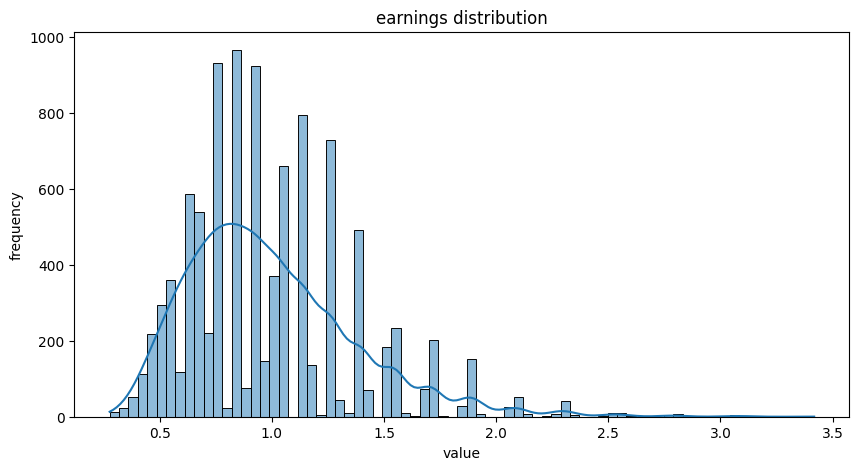

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(earnings, kde=True)
plt.title('earnings distribution')
plt.xlabel('value')
plt.ylabel('frequency')
plt.show()

Now, we also print some statistics of this array such as:
- Average
- Median
- Max
- Min
- std
- var

In [8]:
print('earnings mean:', np.mean(earnings))
print('earnings median:', np.median(earnings))
print('earnings max:', np.max(earnings))
print('earnings min:', np.min(earnings))
print('earnings std:', np.std(earnings))
print('earnings var:', np.var(earnings))

earnings mean: 0.9937342987809379
earnings median: 0.9320653479069909
earnings max: 3.4177485022491734
earnings min: 0.27680918870502824
earnings std: 0.377884278763795
earnings var: 0.14279652813683352


We aslo draw some other plots like violin and box polots for individuals:

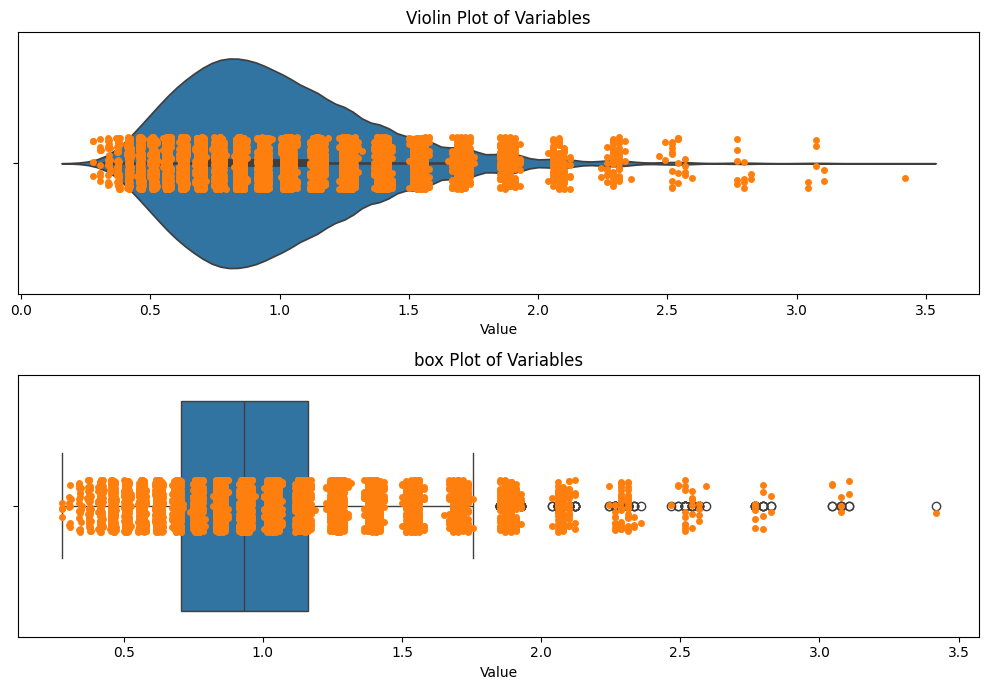

In [9]:
sns.reset_orig()

# Create the figure and axes
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Violin plot
sns.violinplot(x=earnings, ax=ax[0])
sns.stripplot(x=earnings, ax=ax[0])
ax[0].set_title('Violin Plot of Variables')
ax[0].set_xlabel('Value')

# Distribution plot
sns.boxplot(x=earnings, ax=ax[1])
sns.stripplot(x=earnings, ax=ax[1])
ax[1].set_title('box Plot of Variables')
ax[1].set_xlabel('Value')

# Show the plots
plt.tight_layout()
plt.show()


### Task 5:

#### Task
Estimate the parameters of the lognormal distribution (point estimation) from the simulated data.

#### Answer
As we know, the **lognormal** distribution has the below formula:

$$ f\left( x; \theta , \delta^2\right) = \frac{1}{x\sqrt{2\pi}\delta} e^{-\frac{\left(\ln x - \theta \right)^2}{2\delta^2}}$$

Now, we know from the sourcebook, that the **expected value** and **variance** of the above formula, are as follows:
$$\mu = E[X] = e^{\theta + \frac{\delta^2}{2}}$$
$$V(X) = e^{2\theta+2\delta^2} - e^{2\theta+\delta^2}$$

Now, we can say that the relation between lognormal distribution parameters and expected value and variance is as follows:
$$\theta=ln (\mu)  - \delta^2$$
$$\delta^2 = ln\left(1+\frac{\sigma^2}{\mu^2}\right)$$

**The above text is from the reference book.**<br>

We use the **method of momentum** way to estimate the distribution parameters. As we know from the point estimation and the method of momentum, we can estimate the **expected value** of the **population** with the expected value of the **sample** and we can do the same for the variance too.
So, now we calculate $\bar{X}$ and $S^2$ of the sample and then due to above formula, we compute the distribution parameters.

In [10]:
estimated_mean = np.mean(earnings)
estimated_var = sum(np.power(earnings - estimated_mean, 2) / (len(earnings) - 1))
print(f'estimated mean of the population: {estimated_mean}')
print(f'estimated var of the population: {estimated_var}')

estimated mean of the population: 0.9937342987809379
estimated var of the population: 0.1428108092177536


Now, we use the following formula compute $\delta^2$ parameter of the population:

$$\delta^2 = ln\left(1+\frac{\sigma^2}{\mu^2}\right)$$

So the $\delta^2$ is as follows:

In [11]:
delta_2 = np.log(1+estimated_var/np.power(estimated_mean,2))
delta_2

np.float64(0.13507042430797458)

Now, we use the following formula compute $\theta$  parameter of the population:

$$\theta=ln (\mu)  - \delta^2$$

So, the $\theta$ is as follows:

In [12]:
theta = np.log(estimated_mean) - delta_2
theta

np.float64(-0.14135583741525834)

We know (from the reference book) that the lognormal distribution formula is as follows:

$$ f\left( x; \theta , \delta^2\right) = \frac{1}{x\sqrt{2\pi}\delta} e^{-\frac{\left(\ln x - \theta \right)^2}{2\delta^2}}$$

So, now we define a function to compute the probability for each value with the above formula. the function is as follows

In [13]:
def lognormal(x):
    delta = np.sqrt(delta_2)
    
    first_half = 1 / (x * delta * np.sqrt(2 * np.pi))
    power = -((np.log(x) - theta) ** 2) / (2 * delta_2)
    return first_half * np.exp(power)

Now, we test our function to see if it works right or not.

In [14]:
x_axis = np.linspace(np.min(earnings), np.max(earnings), num=len(earnings), endpoint=True)
probabilities = lognormal(x_axis)
str(probabilities)[:120] + '...' # just to avoid printing many lines

'[0.03110737 0.03137164 0.03163754 ... 0.0003047  0.00030439 0.00030408]...'

Now, we plot our lognormal distribution with the estimated values with the earnings of individuals. So, the plot is as follows:

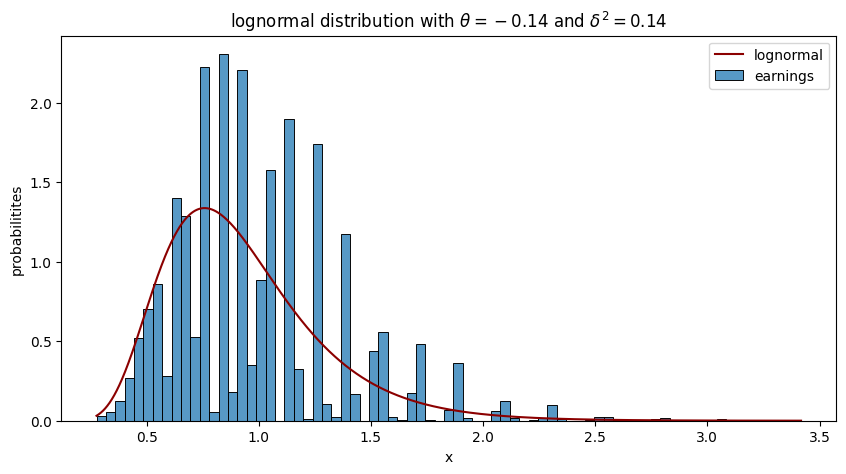

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(earnings, stat='density', label='earnings')
plt.plot(x_axis, probabilities, color='darkred', label='lognormal')
plt.title(r'lognormal distribution with $\theta={:.2f}$ and $\delta^2={:.2f}$'.format(theta, delta_2))
plt.xlabel('x')
plt.ylabel('probabilitites')
plt.legend(loc='best')
plt.show()

Now, we compare the curve that seaborn library fit vs the curve that we fit with our distribution probabilities. The comparison is as follows:

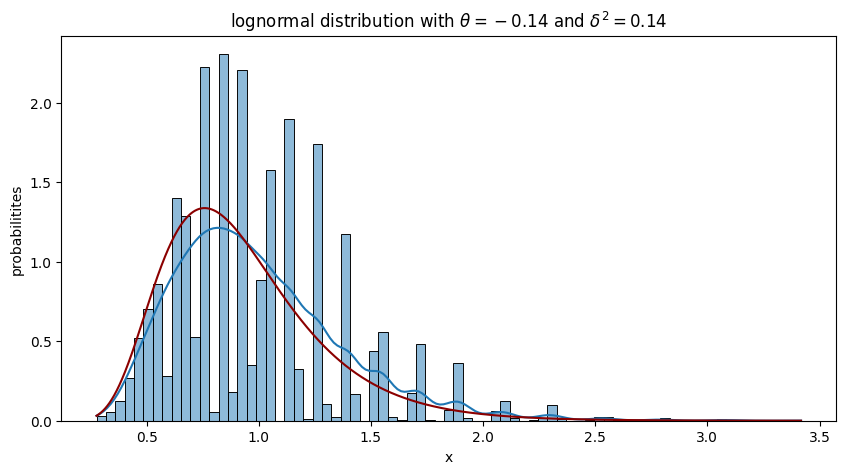

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(earnings, stat='density', kde=True, label='earnings') # stat = 'density', will come and 
# generate the values to make the area under the plot equal to one. So, the y-axis is probability density.
plt.plot(x_axis, probabilities, color='darkred', label='lognormal')
plt.title(r'lognormal distribution with $\theta={:.2f}$ and $\delta^2={:.2f}$'.format(theta, delta_2))
plt.xlabel('x')
plt.ylabel('probabilitites')
plt.show()

Now, from the reference book, we know:

$$ X \sim lognormal(\theta, \delta^2) \rightarrow ln X = Y \sim N(\theta, \delta^2)$$

So, we can say, that:

$$X \sim N(\theta, \delta^2) \rightarrow e^X = Y \sim lognormal(\theta, \delta^2)$$

So, now we plot the $ln$ of the `individual` array to see if it is like the normal distribution with parameters $\mu=\theta$ and $\sigma^2=\delta^2$ or not. So, first, we simplement the noral distribution formula, and hen compare the plots. The plot, is as follows:

In [17]:
def normal(x):
    delta = np.sqrt(delta_2)
    first_half = 1/(np.sqrt(2*np.pi)*delta)
    power = -(np.power(x-theta, 2))/(2*delta_2)
    return first_half * np.exp(power)

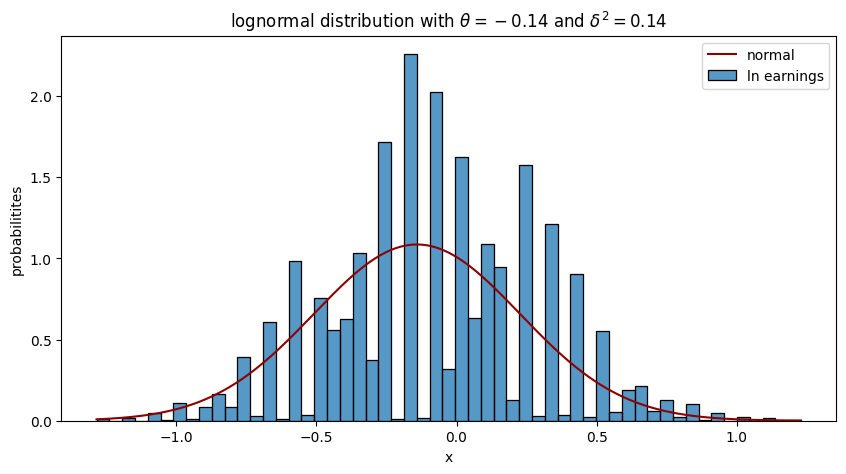

In [18]:
ln_earnings = np.log(earnings)

x_axis_normal = np.linspace(np.min(ln_earnings), np.max(ln_earnings), len(ln_earnings))
norm_prob = normal(x_axis_normal)

plt.figure(figsize=(10, 5))
sns.histplot(ln_earnings, stat='density', label='ln earnings') # stat = 'density', will come and 
# generate the values to make the area under the plot equal to one. So, the y-axis is probability density.
plt.plot(x_axis_normal, norm_prob, color='darkred', label='normal')
plt.title(r'lognormal distribution with $\theta={:.2f}$ and $\delta^2={:.2f}$'.format(theta, delta_2))
plt.xlabel('x')
plt.ylabel('probabilitites')
plt.legend(loc='best')
plt.show()

### Task 6:

#### Task
Overlay the estimated lognormal distribution curve on the histogram.

#### Answer
We did this in the previous sections. But we do this again here. But this time, we define a variable called `BINS_COUNT` and set its value to 25. (we could also use any other value, but if we set its value to something very big, the result won't seem verygood and if we set its value too small, the result won't be good either)

In [19]:
BINS_COUNT = 25

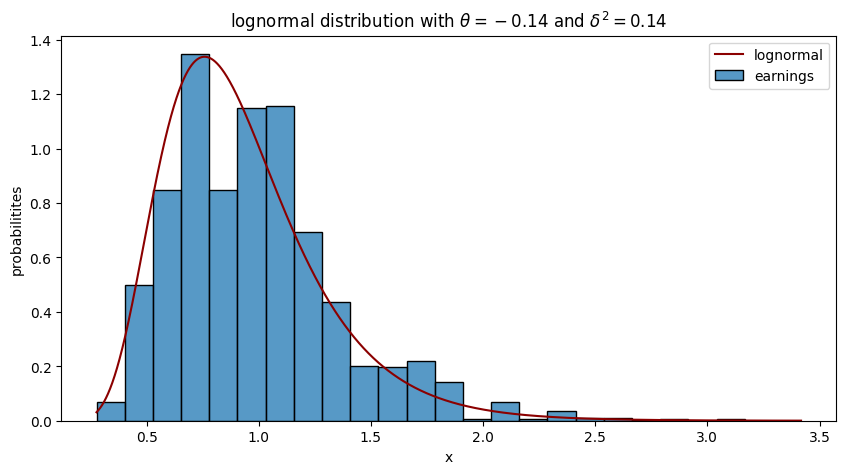

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(earnings, bins=BINS_COUNT, stat='density', label='earnings')
plt.plot(x_axis, probabilities, color='darkred', label='lognormal')
plt.title(r'lognormal distribution with $\theta={:.2f}$ and $\delta^2={:.2f}$'.format(theta, delta_2))
plt.xlabel('x')
plt.ylabel('probabilitites')
plt.legend(loc='best')
plt.show()

### Task 7:

#### Task
Plot the fitted lognormal distribution separately.

#### Answer
we had done this in the previous sections. But we also do it again. First, we plot the fitted lognormal distribution as follows:

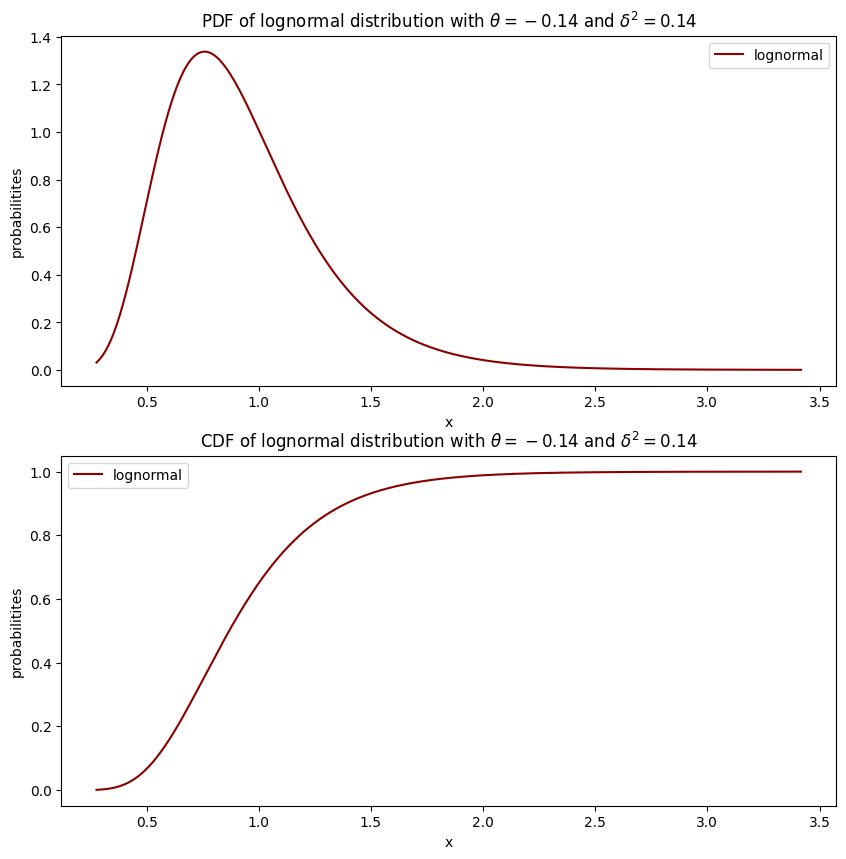

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.plot(x_axis, probabilities, color='darkred', label='lognormal')
ax1.set_title(r'PDF of lognormal distribution with $\theta={:.2f}$ and $\delta^2={:.2f}$'.format(theta, delta_2))
ax1.set_xlabel('x')
ax1.set_ylabel('probabilitites')
ax1.legend(loc='best')

ax2.plot(x_axis, np.cumsum(probabilities)/np.sum(probabilities), color='darkred', label='lognormal')
ax2.set_title(r'CDF of lognormal distribution with $\theta={:.2f}$ and $\delta^2={:.2f}$'.format(theta, delta_2))
ax2.set_xlabel('x')
ax2.set_ylabel('probabilitites')
ax2.legend(loc='best')
plt.show()

# Question 2: Multivariate Analysis - Earnings and Wealth

## Description:

In addition to earnings, families in this society accumulate wealth over time. Wealth is correlated
with earnings, as a fraction of earnings is saved annually.

## Tasks:

### Task 1:

#### Task
Assume each family saves 20% of their annual earnings and spends the rest.

#### Answer
There is nothing to do about this part. This part is just an explanation about the next part.

### Task 2:

#### Task
Simulate the wealth accumulation process over the same 20 periods:
$$Wealth_{t+1} = 0.20 * Earnings_{t+1} + Wealth_t$$

#### Answer:
Now, we iterate over the earnings that we had saved foe each individual and then by the provided formula, we compute their Wealth. So, we have:

In [22]:
wealth = np.zeros(len(earnings))

for earn_arr in earnings_period_list:
    wealth += 0.2*earn_arr

wealth

array([4.81259644, 3.36494169, 5.24887034, ..., 4.18355667, 4.59212846,
       4.47120907])

### Task 3:

#### Task
Plot the joint distribution of final earnings and wealth using a contour plot.

#### Answer
Now, we are asked to plot the joint distribution of the final wealth of the individuals with contour plot. So, we do that as follows:

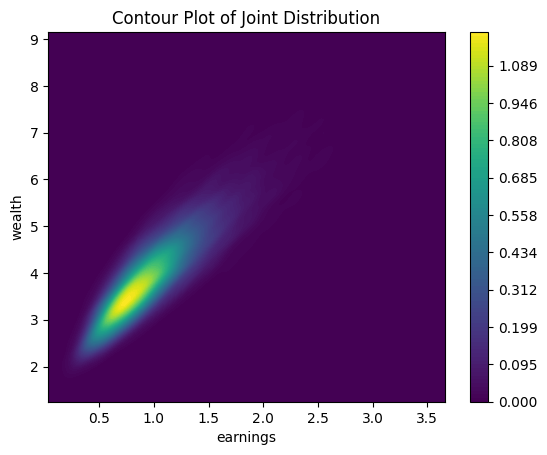

In [23]:
# Create the contour plot using seaborn
sns.kdeplot(x=earnings, y=wealth, fill=True, cmap='viridis', thresh=0, cbar=True, levels=100)

plt.title('Contour Plot of Joint Distribution')
plt.xlabel('earnings')
plt.ylabel('wealth')
plt.show()

Another way to do so is to generate a data frame from data and then cut it into some bins. Then plot the final plot. So, first, we define some variables named `EARNING_BINS` and `WEALTH_BINS` and initialize their value with 15 and 14. (nothing special about 15 and 14, we can do this for any number of bins, but when the bins count is too much or very few, then we won't have good results.)

In [24]:
EARNING_BINS = 15
WEALTH_BINS = 14

Now, we generate the data frame

In [25]:
import pandas as pd

data = {
    'wealth': wealth,
    'earnings': earnings,
}

df = pd.DataFrame(data)
df

,wealth,earnings
0,4.812596,1.278553
1,3.364942,0.855891
2,5.248870,1.265768
3,5.520921,1.718944
4,5.758925,1.890838
...,...,...
9995,4.720089,1.516263
9996,4.046837,0.932065
9997,4.183557,1.127799
9998,4.592128,1.278553


Now, we add a bin column for each of these two variables. We also add another columns called `bin-wealth-mean` and `bin-earnings-mean` in order to use for the `seaborn` library contour plot. We do this as follows:

In [26]:
df['bin-wealth'] = pd.cut(df['wealth'], WEALTH_BINS)
df['bin-wealth-mean'] = pd.cut(df['wealth'], WEALTH_BINS).apply(lambda x: (x.left + x.right) / 2)
df['bin-wealth-mean'] = pd.to_numeric(df['bin-wealth-mean'], errors='coerce')

df['bin-earnings'] = pd.cut(df['earnings'], EARNING_BINS)
df['bin-earnings-mean'] = pd.cut(df['earnings'], EARNING_BINS).apply(lambda x: (x.left + x.right) / 2)
df['bin-earnings-mean'] = pd.to_numeric(df['bin-earnings-mean'], errors='coerce')
df

,wealth,earnings,bin-wealth,bin-wealth-mean,bin-earnings,bin-earnings-mean
0,4.812596,1.278553,"(4.716, 5.198]",4.9570,"(1.114, 1.324]",1.2190
1,3.364942,0.855891,"(3.269, 3.751]",3.5100,"(0.696, 0.905]",0.8005
2,5.248870,1.265768,"(5.198, 5.681]",5.4395,"(1.114, 1.324]",1.2190
3,5.520921,1.718944,"(5.198, 5.681]",5.4395,"(1.533, 1.743]",1.6380
4,5.758925,1.890838,"(5.681, 6.163]",5.9220,"(1.743, 1.952]",1.8475
...,...,...,...,...,...,...
9995,4.720089,1.516263,"(4.716, 5.198]",4.9570,"(1.324, 1.533]",1.4285
9996,4.046837,0.932065,"(3.751, 4.234]",3.9925,"(0.905, 1.114]",1.0095
9997,4.183557,1.127799,"(3.751, 4.234]",3.9925,"(1.114, 1.324]",1.2190
9998,4.592128,1.278553,"(4.234, 4.716]",4.4750,"(1.114, 1.324]",1.2190


We could also plot the contour plot with this data frame and the bin columns now. It would be like this:

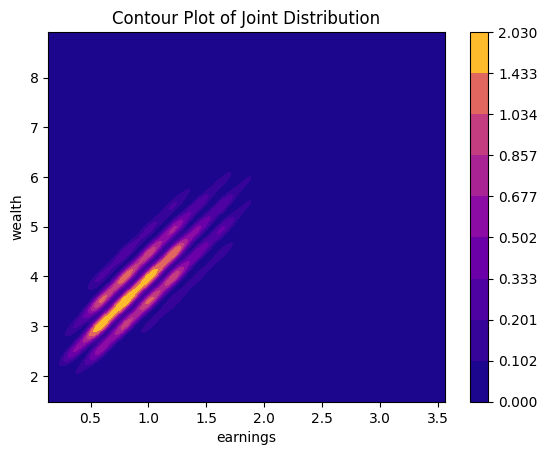

In [27]:
sns.kdeplot(data=df, x='bin-earnings-mean', y='bin-wealth-mean', fill=True, cbar=True, thresh=0, cmap='plasma')

plt.title('Contour Plot of Joint Distribution')
plt.xlabel('earnings')
plt.ylabel('wealth')
plt.show()

Now, we generate the `probability_matrix` as follows:

In [28]:
contingency_matrix = pd.crosstab(df['bin-wealth-mean'], df['bin-earnings-mean'])
contingency_matrix

bin-earnings-mean,0.3800,0.5910,0.8005,1.0095,1.2190,1.4285,1.6380,1.8475,2.0565,2.2660,2.4755,2.6850,2.8945,3.1035,3.3130
bin-wealth-mean,,,,,,,,,,,,,,,
2.0595,45,3,0,0,0,0,0,0,0,0,0,0,0,0,0
2.5455,260,310,18,0,0,0,0,0,0,0,0,0,0,0,0
3.0280,101,922,460,68,1,0,0,0,0,0,0,0,0,0,0
3.5100,12,541,996,536,97,4,0,0,0,0,0,0,0,0,0
3.9925,0,119,592,882,496,75,13,0,0,0,0,0,0,0,0
4.4750,0,6,144,487,645,220,78,6,1,0,0,0,0,0,0
4.9570,0,0,8,114,347,257,173,28,4,2,0,0,0,0,0
5.4395,0,0,0,16,105,150,155,54,19,8,1,0,0,0,0
5.9220,0,0,0,0,18,44,69,55,29,8,1,0,0,0,0


Now, we convert this to the numpy array as follows:

In [29]:
probability_matrix = contingency_matrix.to_numpy()
probability_matrix = probability_matrix / probability_matrix.sum().sum()
str(probability_matrix)[:120] + '...' # in order to avoid too many print lines

'[[0.0045 0.0003 0.     0.     0.     0.     0.     0.     0.     0.\n  0.     0.     0.     0.     0.    ]\n [0.026  0.031...'

We will also need columns and rows values. So, here we compute them as follows:

In [30]:
earning_ordered_vals = contingency_matrix.columns.to_numpy()
earning_ordered_vals

array([0.38  , 0.591 , 0.8005, 1.0095, 1.219 , 1.4285, 1.638 , 1.8475,
       2.0565, 2.266 , 2.4755, 2.685 , 2.8945, 3.1035, 3.313 ])

In [31]:
wealth_ordered_vals = contingency_matrix.index.to_numpy()
wealth_ordered_vals

array([2.0595, 2.5455, 3.028 , 3.51  , 3.9925, 4.475 , 4.957 , 5.4395,
       5.922 , 6.404 , 6.8865, 7.369 , 7.851 , 8.3335])

Now, we have to compute the marginal probabilities of each one of these variables. So, we do as follows:

In [32]:
wealth_marginal = probability_matrix.sum(axis=1)
wealth_marginal

array([0.0048, 0.0588, 0.1552, 0.2186, 0.2177, 0.1587, 0.0933, 0.0508,
       0.0224, 0.0112, 0.0047, 0.0022, 0.001 , 0.0006])

In [33]:
earnings_marginal = probability_matrix.sum(axis=0)
earnings_marginal

array([4.180e-02, 1.901e-01, 2.218e-01, 2.103e-01, 1.711e-01, 7.580e-02,
       5.200e-02, 1.870e-02, 8.500e-03, 5.600e-03, 2.300e-03, 6.000e-04,
       6.000e-04, 7.000e-04, 1.000e-04])

Now, we can plot the contour plot as follows (I searched too much and even asked Copilot for a bit of help to write the following code. At the beginning, and after too much struggling and a lot of searching, (there many problems with axes and showing the value on axes instead of list indices and ...) I found the solution and reached the following code):

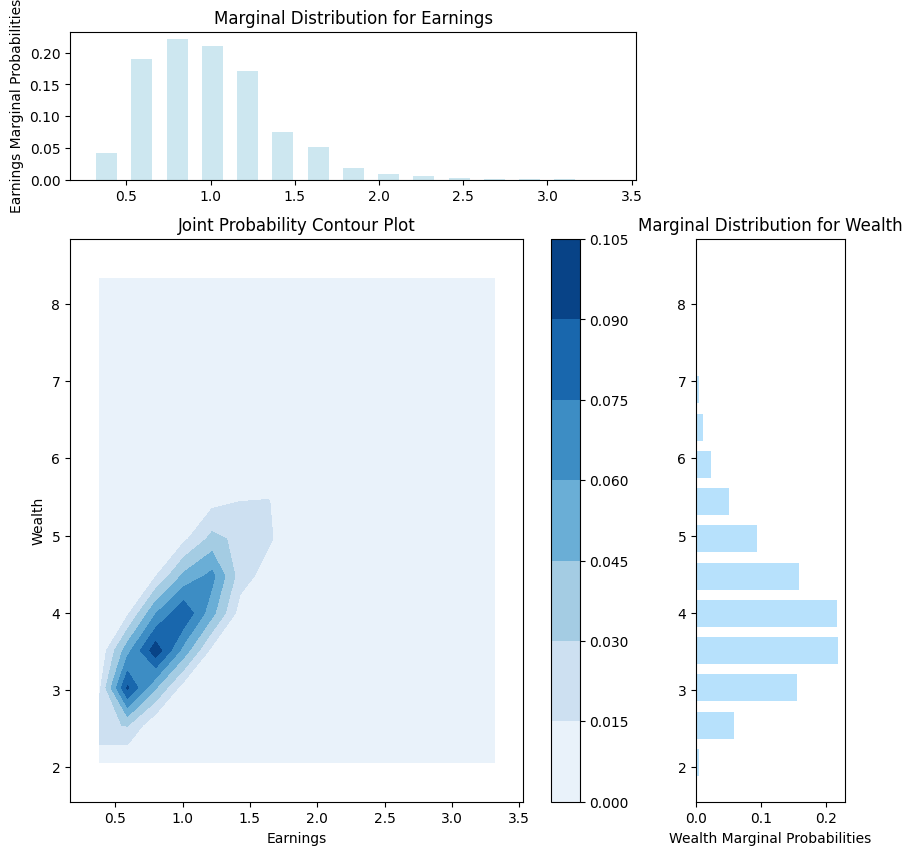

In [34]:
# Create the main figure and gridspec
fig = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.4)


# Joint probability contour plot
main_ax = fig.add_subplot(grid[1:4, 0:3])
contour = main_ax.contourf(earning_ordered_vals, wealth_ordered_vals, probability_matrix, cmap='Blues')
fig.colorbar(contour, ax=main_ax)
main_ax.set_title('Joint Probability Contour Plot')
main_ax.set_xlabel('Earnings')
main_ax.set_ylabel('Wealth')

# Marginal distribution for wealth (horizontal plot)
wealth_ax = fig.add_subplot(grid[0, 0:3], sharex=main_ax)
wealth_ax.bar(earning_ordered_vals, earnings_marginal, color='lightblue',  alpha=0.6, width=0.125)
wealth_ax.set_ylabel('Earnings Marginal Probabilities')
wealth_ax.set_title('Marginal Distribution for Earnings')

# Y Marginal distribution which in our case is earnings (vertical plot)
earnings_ax = fig.add_subplot(grid[1:4, 3], sharey=main_ax)
earnings_ax.barh(wealth_ordered_vals, wealth_marginal, color='lightskyblue', alpha=0.6, height=0.35) # 'barh' makes it horizontal
earnings_ax.set_xlabel('Wealth Marginal Probabilities')
earnings_ax.set_title('Marginal Distribution for Wealth')

# Show the plot
plt.show()

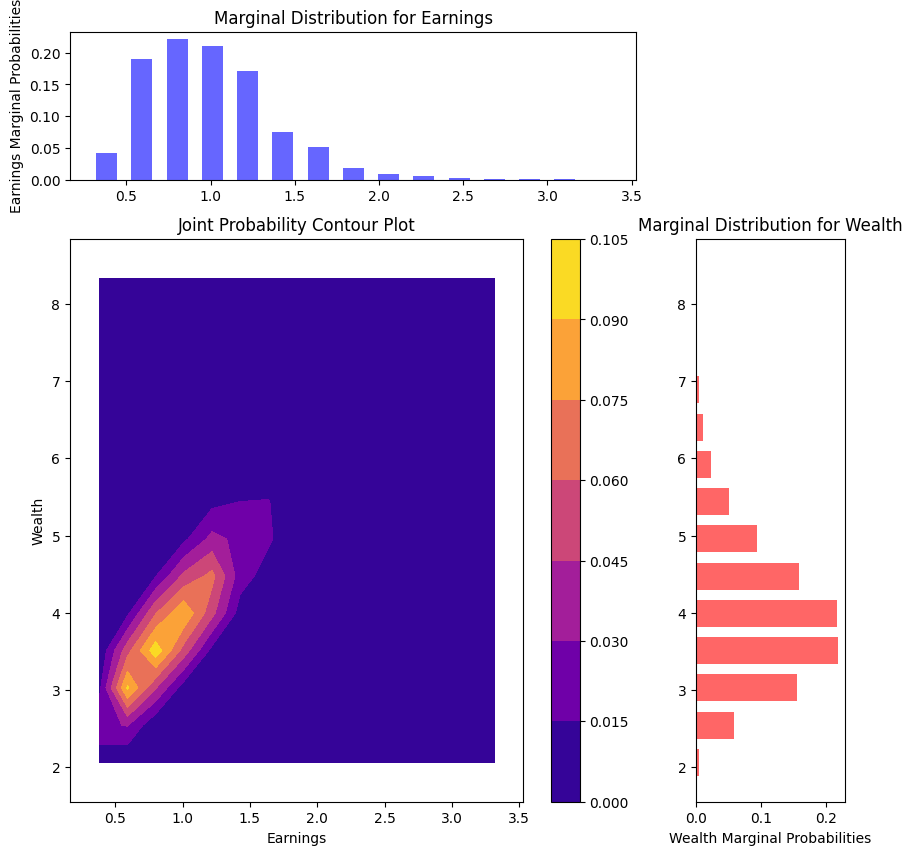

In [35]:
# Create the main figure and gridspec
fig = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.4)


# Joint probability contour plot
main_ax = fig.add_subplot(grid[1:4, 0:3])
contour = main_ax.contourf(earning_ordered_vals, wealth_ordered_vals, probability_matrix, cmap='plasma')
fig.colorbar(contour, ax=main_ax)
main_ax.set_title('Joint Probability Contour Plot')
main_ax.set_xlabel('Earnings')
main_ax.set_ylabel('Wealth')

# Marginal distribution for wealth (horizontal plot)
wealth_ax = fig.add_subplot(grid[0, 0:3], sharex=main_ax)
wealth_ax.bar(earning_ordered_vals, earnings_marginal, color='blue',  alpha=0.6, width=0.125)
wealth_ax.set_ylabel('Earnings Marginal Probabilities')
wealth_ax.set_title('Marginal Distribution for Earnings')

# Y Marginal distribution which in our case is earnings (vertical plot)
earnings_ax = fig.add_subplot(grid[1:4, 3], sharey=main_ax)
earnings_ax.barh(wealth_ordered_vals, wealth_marginal, color='red', alpha=0.6, height=0.35) # 'barh' makes it horizontal
earnings_ax.set_xlabel('Wealth Marginal Probabilities')
earnings_ax.set_title('Marginal Distribution for Wealth')

# Show the plot
plt.show()

### Task 4:

#### Task
Compute the Pearson correlation coefficient between final earnings and wealth.

#### Answer
we know that the **Pearson correlation coefficient** can be computed with the following formula:

$$ \rho_{X,Y} = \frac{cov\left(X,Y \right)}{\sigma_{X}\sigma_{Y}}$$

Which we know that the formula for the $cov\left(X,Y \right)$ is as follows:

$$cov\left(X,Y \right) = E[\left(X-\mu_X \right) \left(Y-\mu_Y \right)]$$

And for our use cases, we we have discrete samples, so the formula would be as follows:

$$cov\left(X,Y \right) = \frac{ \sum_i{\left(x_i - \bar{x}\right) \left(y_i - \bar{y}\right)} }{n-1}$$

So, first, we write a code to compute the $cov\left(X, Y \right)$ as follows:

In [36]:
def covariance(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_diff = x - x_mean
    y_dif = y - y_mean
    return np.sum(x_diff * y_dif) / (len(x_diff)-1)

Now, we test our function to see if it works correctly or not. We give it the following arrays: <br>

In [37]:
x = np.array(list(range(1000)))
y = np.array(list(range(1000))[::-1]) # same list, reverse order
res = covariance(x, y)
expected_res = np.cov(x, y)[0, 1]
print(f'computed covariance: {res} \t correct res: {expected_res} \t answer is: {res == expected_res}')

computed covariance: -83416.66666666667 	 correct res: -83416.66666666667 	 answer is: True


Now, we move to the next part that we compute the $\rho$ from the $cov$ and variances. So, the code for computing the Pearson's correlation coefficient is as follows:

In [38]:
def pearson_corr_coeff(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_2 = np.power(x, 2)
    y_2 = np.power(y, 2)
    x_diff = x_2 - np.power(x_mean, 2)
    y_diff = y_2 - np.power(y_mean, 2)
    x_std = np.sqrt(np.sum(x_diff) / (len(x)-1))
    y_std = np.sqrt(np.sum(y_diff) / (len(y)-1))
    cov = covariance(x, y)
    return cov / (x_std*y_std)

Now, we check the function with the following inputs and compare it with the reult of a library. So we do as follows (There also might be a slight difference in our computation and the library result, and thats because of the **percision lost** that we have from bringing the numpy result from c to python):

In [39]:
x = np.array(list(range(1, 1000, 2)))
y = np.array(list(range(1, 2000, 4))[::-1]) # same list, reverse order
res = pearson_corr_coeff(x, y)
expected_res = np.corrcoef(x, y)[0, 1]
print(f'computed Perasoncorrelation coefficient: {res} \t correct res: {expected_res} \t answer is: {res == expected_res}')

computed Perasoncorrelation coefficient: -1.0 	 correct res: -1.0 	 answer is: True


Now that we have checked our function functionality, then we go to the part that we compute the Pearson coefficient between final earnings and wealth. So the code for this purpose, is as follows:

In [40]:
pear_coeff = pearson_corr_coeff(earnings, wealth)
print(f'The Pearson Correlation Coefficient between earning and wealth is: {pear_coeff}')

The Pearson Correlation Coefficient between earning and wealth is: 0.8763755186606612


Now, we compute it again with the `numpy.corrcoef` function to see if we have computed it correctly or not. The code is as follows:

In [41]:
expected_res = np.corrcoef(earnings, wealth)[0, 1]
print(f'library computed value is: {expected_res}')

library computed value is: 0.8763755186606629


There is a little difference between our computation and the library computation. And the reason for that is the persicion lost that we have in computation and moving the results from c code (in `numpy` library) to python. You can see the amount of this small difference below:

In [42]:
print(f'difference between our computation and library computation is: {pear_coeff - expected_res}')

difference between our computation and library computation is: -1.6653345369377348e-15


### Task 5:

#### Task:
Analyze the wealth distribution for families with low earnings (e.g., bottom 20%).

#### Answer
For this part, first, we define a variable and we set the percentage of the lower earning families that we want to analyes and then only get their wealth and earning.

In [43]:
LOWER_PERCENT = 20

Now we get only those who are in the lower 20% of the earning populations as follows:

In [44]:
threshold = np.percentile(earnings, LOWER_PERCENT)


lower_wealth = []
lower_earnings = []
for i in range(len(earnings)):
    if earnings[i] <= threshold:
        lower_wealth.append(wealth[i])
        lower_earnings.append(earnings[i])

In [45]:
str([(x, y) for x, y in zip(lower_wealth, lower_earnings)])[:120] + '...' # to avoid printing many lines

'[(np.float64(2.6792311018119492), np.float64(0.40937003351821405)), (np.float64(2.9046336253957814), np.float64(0.567222...'

Now, we plot these individuals wealth as follows:

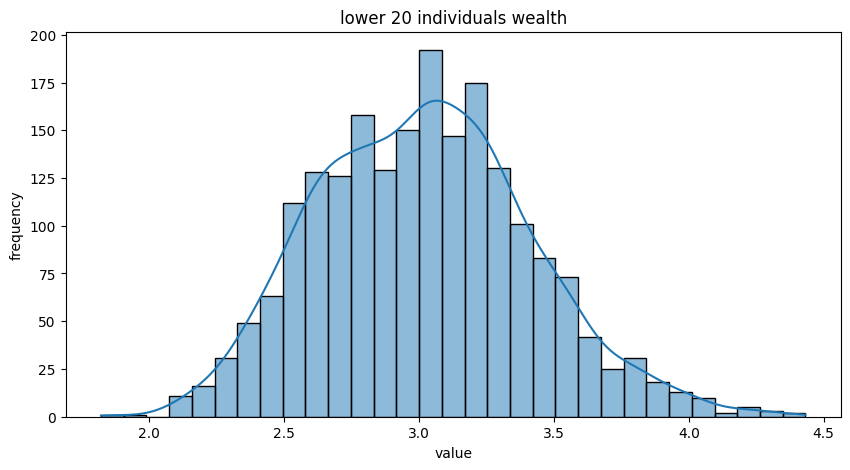

In [46]:
plt.figure(figsize=(10, 5))
sns.histplot(lower_wealth, kde=True, label=f'individuals wealth')
plt.title(f'lower {LOWER_PERCENT} individuals wealth')
plt.xlabel('value')
plt.ylabel('frequency')
plt.show()

As we can see, the distribution is very simillar to normal distribution.

Let's also see the lower individuals earnings too:

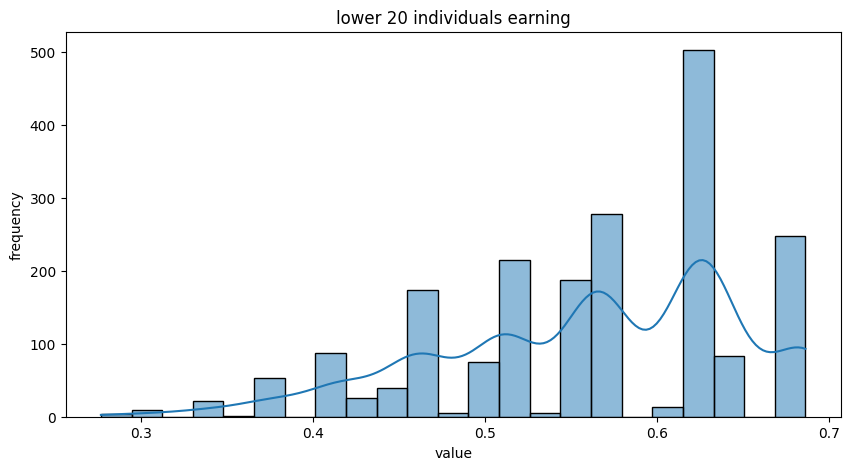

In [47]:
plt.figure(figsize=(10, 5))
sns.histplot(lower_earnings, kde=True, label=f'individuals earning')
plt.title(f'lower {LOWER_PERCENT} individuals earning')
plt.xlabel('value')
plt.ylabel('frequency')
plt.show()

Now, lets plot have the contour plot of these individuals too to see whether it is different from previous one or not. The codes are in the previous sectiojns, so we just copy paste them here and we won't explain them so much. (The following code, at first, was just a copy and paste version of the code that we had earlier, but we had a tiny issue with it, it didn't fill the whole plot, some areas of the plots would have remained white. for correcting and eliminating these whiteareas, I did too much searches but they didn't lead me to any where. But I came with an idea, I filled the plot before plotting the original contour plot with the color that would have represented the lowest probability in the contour plot. So, I added the following three first lines of code to set the plot default color that purple like color which I found its RBG in [this](https://waldyrious.net/viridis-palette-generator/) link. So, These 3 first lines of the code are added for this purpose, to eliminate the white areas which was generated unwillingly)

###### simple contour plot

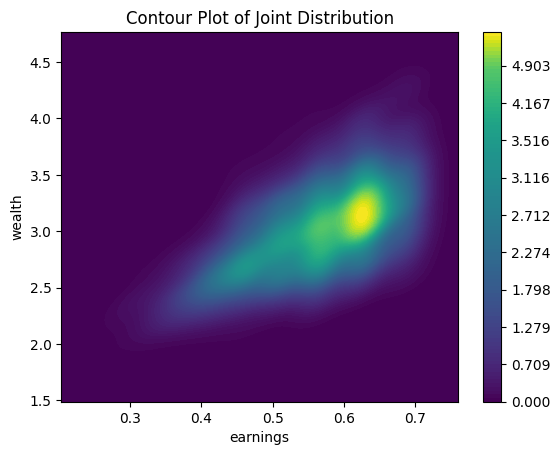

In [48]:
# The following two lines are the lines that we talked about at the above markdown cell
ax=plt.gca()
viridis_lowers_color = (68/255, 1/255, 84/255)
ax.set_facecolor(viridis_lowers_color)

sns.kdeplot(x=lower_earnings, y=lower_wealth, fill=True, cbar=True, levels=100, cmap='viridis', thresh=0, ax=ax)

plt.title('Contour Plot of Joint Distribution')
plt.xlabel('earnings')
plt.ylabel('wealth')
plt.show()

###### our contour approach

In [49]:
lower_earning_bins = 6
lower_wealth_bins = 5

In [50]:
data = {
    'wealth': lower_wealth,
    'earnings': lower_earnings,
}

lower_df = pd.DataFrame(data)
lower_df

,wealth,earnings
0,2.679231,0.409370
1,2.904634,0.567222
2,3.719792,0.623945
3,2.563825,0.510500
4,3.259204,0.561550
...,...,...
2022,2.835039,0.555935
2023,3.060762,0.572952
2024,2.398140,0.417682
2025,3.165071,0.617705


In [51]:
lower_df['bin-wealth'] = pd.cut(lower_df['wealth'], WEALTH_BINS)
lower_df['bin-wealth-mean'] = pd.cut(lower_df['wealth'], WEALTH_BINS).apply(lambda x: (x.left + x.right) / 2)
lower_df['bin-wealth-mean'] = pd.to_numeric(lower_df['bin-wealth-mean'], errors='coerce')
lower_df
lower_df['bin-earnings'] = pd.cut(lower_df['earnings'], EARNING_BINS)
lower_df['bin-earnings-mean'] = pd.cut(lower_df['earnings'], EARNING_BINS).apply(lambda x: (x.left + x.right) / 2)
lower_df['bin-earnings-mean'] = pd.to_numeric(lower_df['bin-earnings-mean'], errors='coerce')
lower_df

,wealth,earnings,bin-wealth,bin-wealth-mean,bin-earnings,bin-earnings-mean
0,2.679231,0.409370,"(2.568, 2.754]",2.6610,"(0.386, 0.413]",0.3995
1,2.904634,0.567222,"(2.754, 2.941]",2.8475,"(0.55, 0.577]",0.5635
2,3.719792,0.623945,"(3.686, 3.873]",3.7795,"(0.604, 0.632]",0.6180
3,2.563825,0.510500,"(2.381, 2.568]",2.4745,"(0.495, 0.523]",0.5090
4,3.259204,0.561550,"(3.127, 3.313]",3.2200,"(0.55, 0.577]",0.5635
...,...,...,...,...,...,...
2022,2.835039,0.555935,"(2.754, 2.941]",2.8475,"(0.55, 0.577]",0.5635
2023,3.060762,0.572952,"(2.941, 3.127]",3.0340,"(0.55, 0.577]",0.5635
2024,2.398140,0.417682,"(2.381, 2.568]",2.4745,"(0.413, 0.441]",0.4270
2025,3.165071,0.617705,"(3.127, 3.313]",3.2200,"(0.604, 0.632]",0.6180


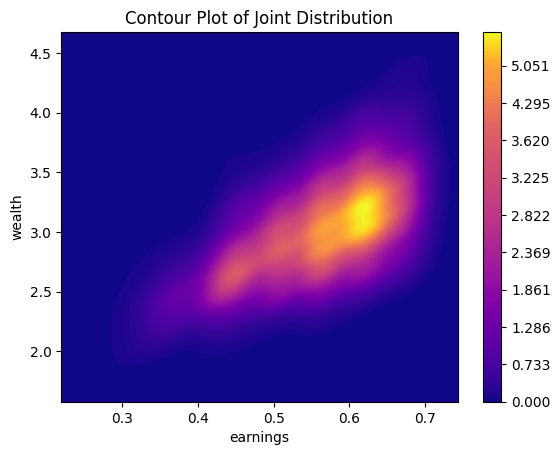

In [52]:
sns.kdeplot(data=lower_df, x='bin-earnings-mean', y='bin-wealth-mean', fill=True, cbar=True, thresh=0, cmap='plasma', levels=100)

plt.title('Contour Plot of Joint Distribution')
plt.xlabel('earnings')
plt.ylabel('wealth')
plt.show()

In [53]:
lower_contingency_matrix = pd.crosstab(lower_df['bin-wealth-mean'], lower_df['bin-earnings-mean'])

lower_probability_matrix = lower_contingency_matrix.to_numpy()
lower_probability_matrix = lower_probability_matrix / lower_probability_matrix.sum().sum()

lower_earning_ordered_vals = lower_contingency_matrix.columns.to_numpy()

lower_wealth_ordered_vals = lower_contingency_matrix.index.to_numpy()

lower_wealth_marginal = lower_probability_matrix.sum(axis=1)

lower_earnings_marginal = lower_probability_matrix.sum(axis=0)

lower_contingency_matrix

bin-earnings-mean,0.2900,0.3175,0.3450,0.3725,0.3995,0.4270,0.4545,0.4815,0.5090,0.5365,0.5635,0.5905,0.6180,0.6455,0.6725
bin-wealth-mean,,,,,,,,,,,,,,,
1.9135,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2.1015,1,2,6,3,0,3,3,0,0,0,0,0,0,0,0
2.2880,1,2,7,14,2,12,9,1,6,0,6,0,0,0,0
2.4745,0,3,6,22,2,37,27,5,36,0,29,0,12,0,1
2.6610,1,1,2,10,2,31,59,6,50,0,63,2,40,6,12
2.8475,0,0,1,4,1,17,40,9,69,3,90,6,54,7,26
3.0340,0,0,0,0,0,4,20,8,60,2,95,3,118,24,38
3.2200,0,0,0,0,0,0,19,3,41,0,74,3,125,16,51
3.4065,0,0,0,0,0,0,6,1,20,0,52,2,74,18,48


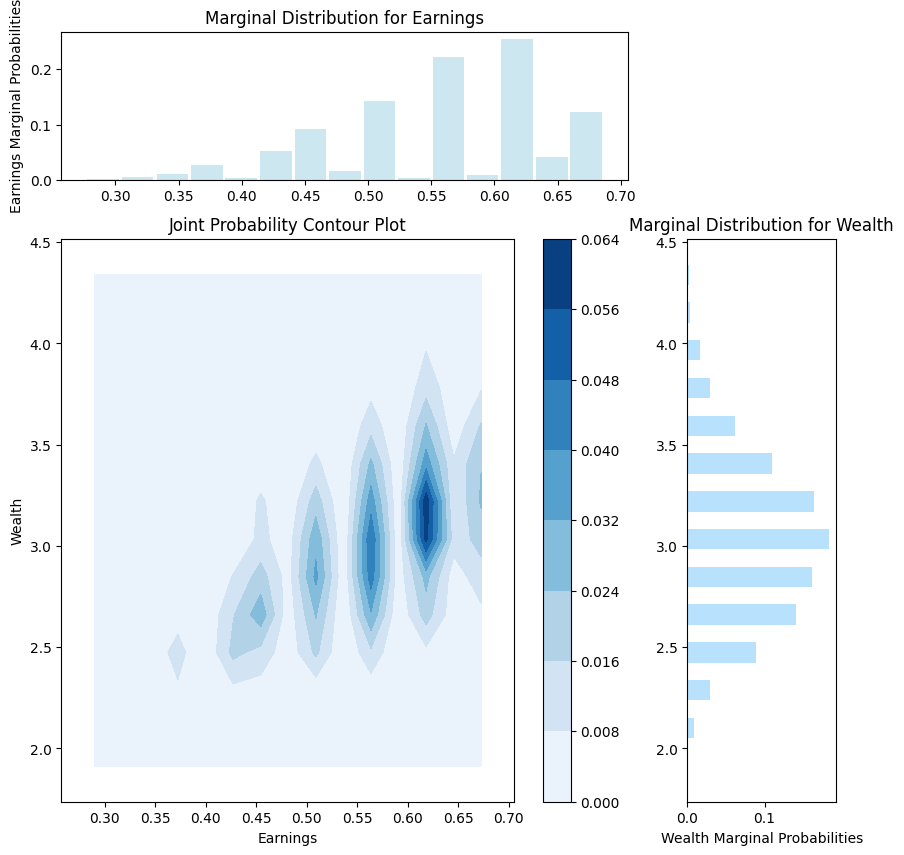

In [54]:
# Create the main figure and gridspec
fig = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.4)


# Joint probability contour plot
main_ax = fig.add_subplot(grid[1:4, 0:3])
contour = main_ax.contourf(lower_earning_ordered_vals, lower_wealth_ordered_vals, lower_probability_matrix, cmap='Blues')
fig.colorbar(contour, ax=main_ax)
main_ax.set_title('Joint Probability Contour Plot')
main_ax.set_xlabel('Earnings')
main_ax.set_ylabel('Wealth')

# Marginal distribution for wealth (horizontal plot)
wealth_ax = fig.add_subplot(grid[0, 0:3], sharex=main_ax)
wealth_ax.bar(lower_earning_ordered_vals, lower_earnings_marginal, color='lightblue', alpha=0.6, width=0.025)
wealth_ax.set_ylabel('Earnings Marginal Probabilities')
wealth_ax.set_title('Marginal Distribution for Earnings')

# Y Marginal distribution which in our case is earnings (vertical plot)
earnings_ax = fig.add_subplot(grid[1:4, 3], sharey=main_ax)
earnings_ax.barh(lower_wealth_ordered_vals, lower_wealth_marginal, color='lightskyblue', alpha=0.6, height=0.1) # 'barh' makes it horizontal
earnings_ax.set_xlabel('Wealth Marginal Probabilities')
earnings_ax.set_title('Marginal Distribution for Wealth')

plt.show()

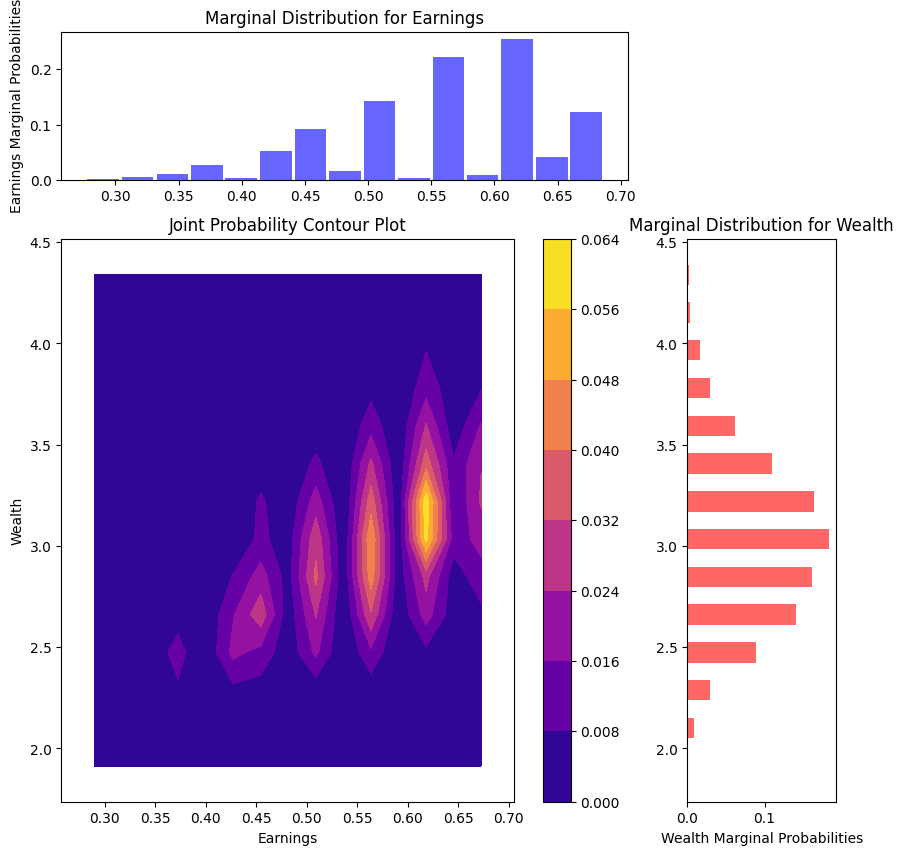

In [55]:
# Create the main figure and gridspec
fig = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.4)


# Joint probability contour plot
main_ax = fig.add_subplot(grid[1:4, 0:3])
contour = main_ax.contourf(lower_earning_ordered_vals, lower_wealth_ordered_vals, lower_probability_matrix, cmap='plasma')
fig.colorbar(contour, ax=main_ax)
main_ax.set_title('Joint Probability Contour Plot')
main_ax.set_xlabel('Earnings')
main_ax.set_ylabel('Wealth')

# Marginal distribution for wealth (horizontal plot)
wealth_ax = fig.add_subplot(grid[0, 0:3], sharex=main_ax)
wealth_ax.bar(lower_earning_ordered_vals, lower_earnings_marginal, color='blue',  alpha=0.6, width=0.025)
wealth_ax.set_ylabel('Earnings Marginal Probabilities')
wealth_ax.set_title('Marginal Distribution for Earnings')

# Y Marginal distribution which in our case is earnings (vertical plot)
earnings_ax = fig.add_subplot(grid[1:4, 3], sharey=main_ax)
earnings_ax.barh(lower_wealth_ordered_vals, lower_wealth_marginal, color='red', alpha=0.6, height=0.1) # 'barh' makes it horizontal
earnings_ax.set_xlabel('Wealth Marginal Probabilities')
earnings_ax.set_title('Marginal Distribution for Wealth')

# Show the plot
plt.show()

# References

Some references are as follows:
- classes and notes
- reference book
- TA classes
- some websites like GeeksForGeeks, kaggle, stackoverflow and etc
- many other references for the coding part